In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import string, nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')








[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/SayamAlt/Fake-Reviews-Detection/main/fake%20reviews%20dataset.csv")

In [5]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [6]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [8]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

In [10]:
df['rating'].value_counts().keys()

Float64Index([5.0, 4.0, 3.0, 1.0, 2.0], dtype='float64')

In [11]:
df['rating'].value_counts().values

array([24559,  7965,  3786,  2155,  1967])

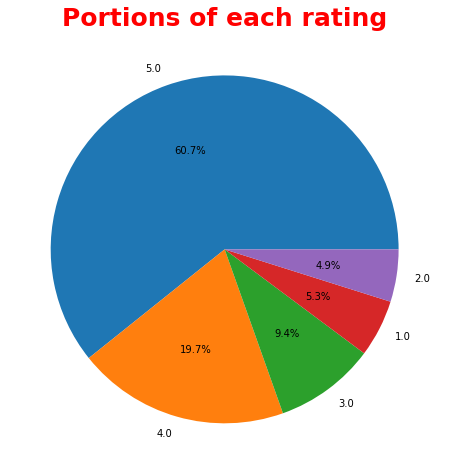

In [12]:
plt.figure(figsize=(15,8))
lab = df['rating'].value_counts().keys()
val = df['rating'].value_counts().values
plt.pie(val, labels = lab, autopct='%1.1f%%')
plt.title("Portions of each rating", fontweight='bold',fontsize=25, color='red')
plt.show()

# Removing punctuations and stop words from 1st comment

In [13]:
# removing all punctuations of 1st comment and returning all the letters as indiviudal elements of list
a=[]
for w in df['text_'][0]:
  if w not in string.punctuation:
    a.append(w)


In [14]:
print(a)

['L', 'o', 'v', 'e', ' ', 't', 'h', 'i', 's', ' ', ' ', 'W', 'e', 'l', 'l', ' ', 'm', 'a', 'd', 'e', ' ', 's', 't', 'u', 'r', 'd', 'y', ' ', 'a', 'n', 'd', ' ', 'v', 'e', 'r', 'y', ' ', 'c', 'o', 'm', 'f', 'o', 'r', 't', 'a', 'b', 'l', 'e', ' ', ' ', 'I', ' ', 'l', 'o', 'v', 'e', ' ', 'i', 't', 'V', 'e', 'r', 'y', ' ', 'p', 'r', 'e', 't', 't', 'y']


In [15]:
# returns the 1st comment as a string without any punctuation
# '' means every element joined without any space
a = ''.join(a)
a

'Love this  Well made sturdy and very comfortable  I love itVery pretty'

In [16]:
type(a)

str

In [17]:
# remove stop words, again convert string into list
a.split()

['Love',
 'this',
 'Well',
 'made',
 'sturdy',
 'and',
 'very',
 'comfortable',
 'I',
 'love',
 'itVery',
 'pretty']

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# displaying list without stop word
b=[]
for word in a.split():
  if word.lower() not in stopwords.words('english'):
    b.append(word)
b

['Love', 'Well', 'made', 'sturdy', 'comfortable', 'love', 'itVery', 'pretty']

In [22]:
# convert list into string by seperating each word with a space ' '
b = ' '.join(b)
b

'Love Well made sturdy comfortable love itVery pretty'

#Writing a function for the process to happen for all comments

In [23]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# running fxn for only 1st 5 comments instead of 40k lines
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [26]:
df.shape

(40432, 4)

In [27]:
df.dtypes

category     object
rating      float64
label        object
text_        object
dtype: object

In [28]:
# convert type of '_text' column to string
df['text_'] = df['text_'].astype(str)

In [29]:
df.dtypes

category     object
rating      float64
label        object
text_        object
dtype: object

In [30]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [31]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [32]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [33]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [34]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [35]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [36]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [39]:
stemmer = PorterStemmer()
def stem_words(text):
  return ' '.join([stemmer.stem(word) for word in text.split() ])

In [ ]:
df['text_'] = df['text_'].apply(stem_words)

In [43]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [44]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['text_'] = df['text_'].apply(lemmatize_words)

In [45]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [46]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')